#### DEPENDENCIES
- conda install -c https://conda.anaconda.org/plotly plotly
- conda install -c conda-forge basemap=1.0.8.dev0
- pip install folium


# Investigate the relationship among Terrorism, Gross Domestic Product (GDP) and Tourism.

-  Vaishali Mathur - vmathur1@umbc.edu



# Objectives

- Hypothesis
    - H1: There are instances where GDP of a country gets affected due to terrorism activity

    - H2: There are instances where Tourism of a country gets affected due to terrorism activity
    
    
- Classify/cluster the countries based on various aspects such as Safety, Economic Growth,  etc.
- Identify the countries in which the terrorism is reduced significantly. 


# Description of Datasets
- #### Global Terrorism Dataset
    - It contains information of terrorist attacks between 1970 and 2016.
- #### Gross Domestic Product Dataset
    - Sum of gross value added by all resident producers in the economy measured in current US dollars between 1960 and 2016.
- #### International Tourism Dataset
    - It contains number of international inbound tourists, traveling to a country other than that of their usual residence in a particular year.


# Data Pre-processing
- #### Handling Missing Values
    - Replace it with mean value
    - Removal of the tupules with null values
- #### Removal of irrelevant attributes
- #### Data Transformation
- #### Data Visualization to understand the data
- #### Outlier detection
    - Outliers are important in this study
        - Countries with ridiculous amount of terrorist activity is not an outlier.  

In [1]:
#importing the required modules 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np
from mpl_toolkits.basemap import Basemap
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [2]:
#Loading three datasets 
terrorism_dataset = pd.read_excel("terrorism_dataset.xlsx")
tourism_dataset   = pd.read_excel("tourism_dataset.xlsx")
gdp_dataset       = pd.read_excel("gdp_dataset.xlsx")

In [3]:
# Preprocessing of the terrorism Dataset
terrorism_dataset.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terrorism_dataset=terrorism_dataset[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Group','Target_type','Weapon_type','Motive']]
terrorism_dataset.head(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN


In [4]:
#Preprocessing of the tourism Dataset
tourism_transpose = tourism_dataset.transpose()
tourism_transpose.columns = tourism_transpose.iloc[0]
tourism_transpose.drop(['Country Code','Country Name','Indicator Name','Indicator Code'], inplace= True)


In [5]:
# Preprocessing of the GDP dataset
gdp_transpose = gdp_dataset.transpose()
gdp_transpose.columns = gdp_transpose.iloc[0]
gdp_transpose.drop(['Country Code','Country Name','Indicator Name','Indicator Code'], inplace= True)

# Analysis of Terrorism Dataset

#### Year Vs Number Of Terrorist Activities

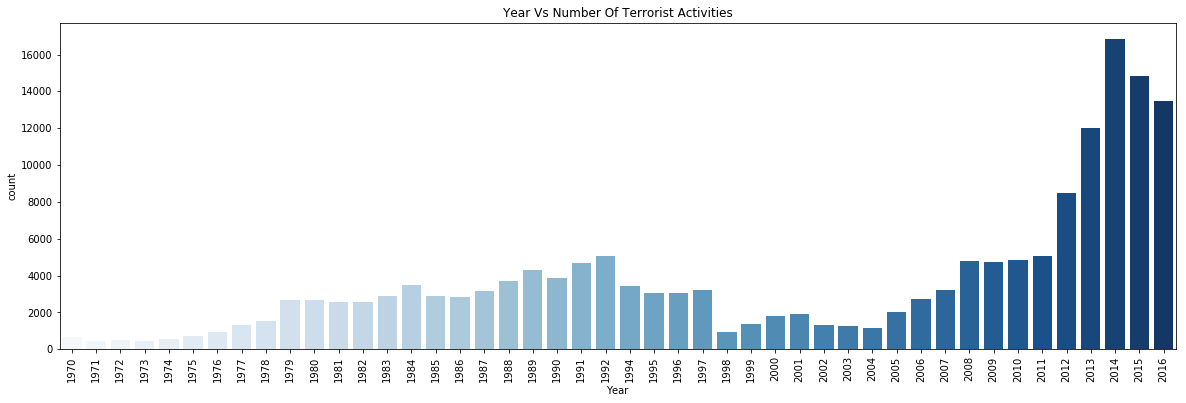

In [6]:
plt.subplots(figsize=(20,6))
sns.countplot('Year',data=terrorism_dataset, palette="Blues")
plt.xticks(rotation=90)
plt.title('Year Vs Number Of Terrorist Activities')
plt.show()

- Terrorist Attacks have increased in the recent years.

#### Top 20 Countries with Terrorist Activities

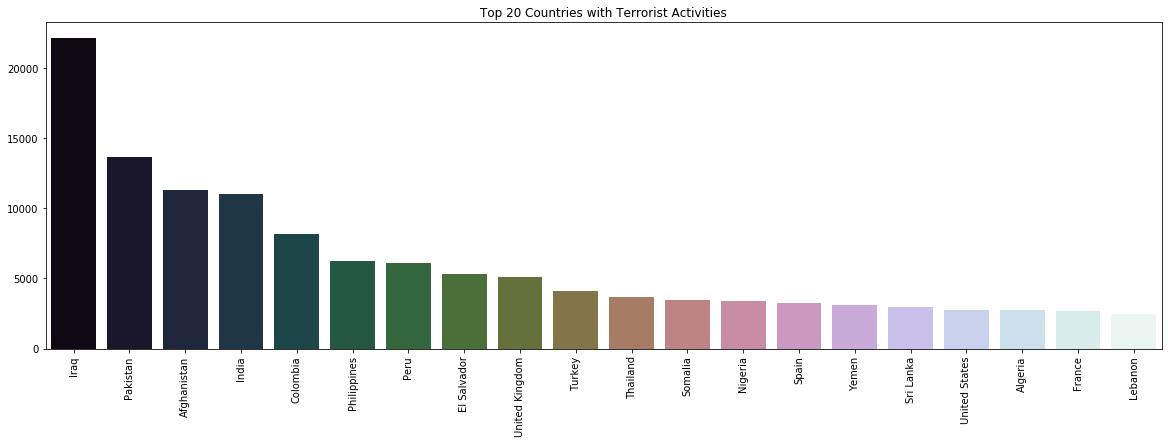

In [7]:
plt.subplots(figsize=(20,6))
sns.barplot(terrorism_dataset['Country'].value_counts()[:20].index,terrorism_dataset['Country'].value_counts()[:20].values,palette='cubehelix')
plt.xticks(rotation=90)
plt.title('Top 20 Countries with Terrorist Activities')
plt.show()

###### This shows the Top 20 Countries in the world with the Terrorist Attacks 
- Iraq is the country with high number of terrorist attacks.
- Pakistan, Afghanistan, India, Columbia are next in the list

In [8]:
print('Country with the Most Terrorist Attacks:',terrorism_dataset['Country'].value_counts().index[0])
print('Region with the Most Terrorist Attacks:',terrorism_dataset['Region'].value_counts().index[0])
print('Country with the least Terrorist Attacks:', terrorism_dataset['Country'].value_counts().tail(1).index[0])
print('Region with the Most Terrorist Attacks:',terrorism_dataset['Region'].value_counts().tail(1).index[0])

Country with the Most Terrorist Attacks: Iraq
Region with the Most Terrorist Attacks: Middle East & North Africa
Country with the least Terrorist Attacks: South Vietnam
Region with the Most Terrorist Attacks: Australasia & Oceania


#### Analysis of Most Terrorists Attack Type

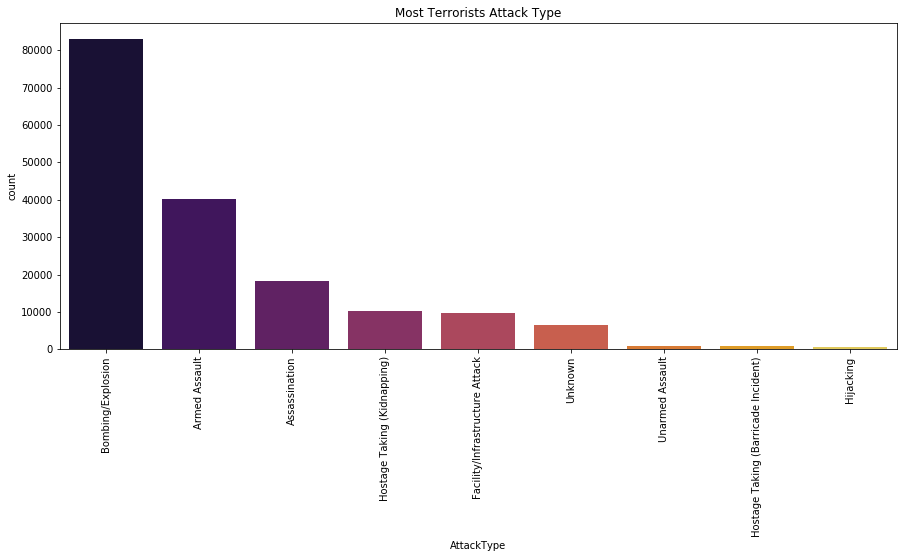

In [9]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terrorism_dataset,palette='inferno',order=terrorism_dataset['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Most Terrorists Attack Type')
plt.show()

Above Graph shows the different types of attacks
- Most Terrorist Attack Type is Bombing/Explosion


#### Analysis of Most Targeted Places in Terrorist Attacks

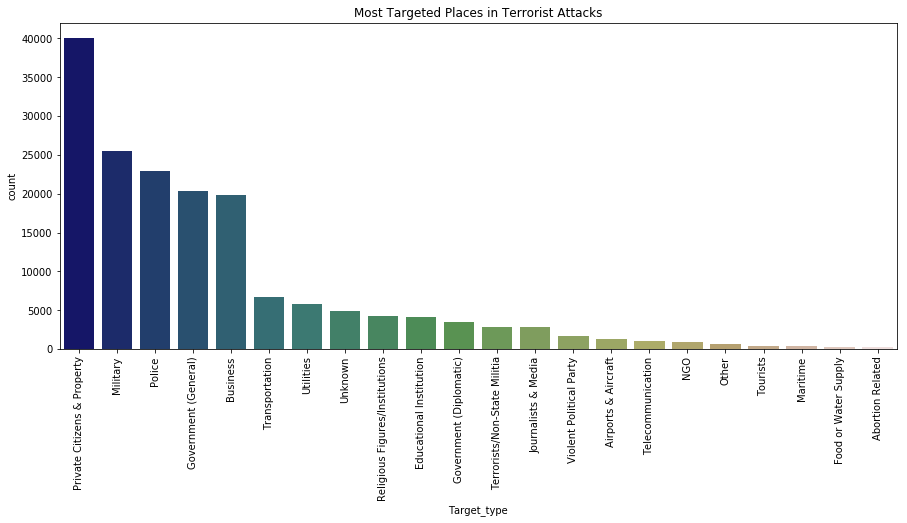

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot(terrorism_dataset['Target_type'],palette='gist_earth',order=terrorism_dataset['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Most Targeted Places in Terrorist Attacks')
plt.show()

##### This shows several Targets in Terrorist Attack
- Private Citizens and Property is the most targeted one.

#### Analysis of Terrorist Activities by Region

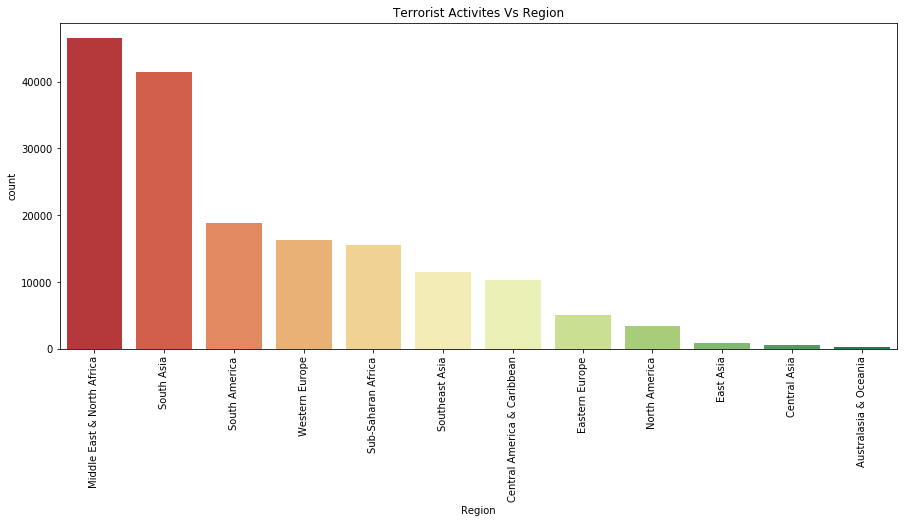

In [11]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=terrorism_dataset,palette='RdYlGn',order=terrorism_dataset['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorist Activites Vs Region')
plt.show()

- Middle East and North Africa is the most affected region due to terrorism

#### Terrorist Activities in the Region by Year

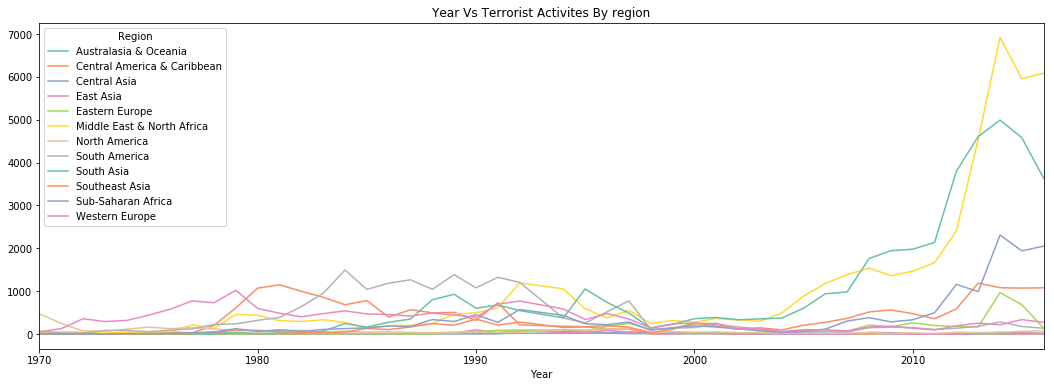

In [12]:
terror_region=pd.crosstab(terrorism_dataset.Year,terrorism_dataset.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Year Vs Terrorist Activites By region')
plt.show()

- Terrorism Activities have been rising in Middle East and North Africa over these years

#### Attack Type Vs Region

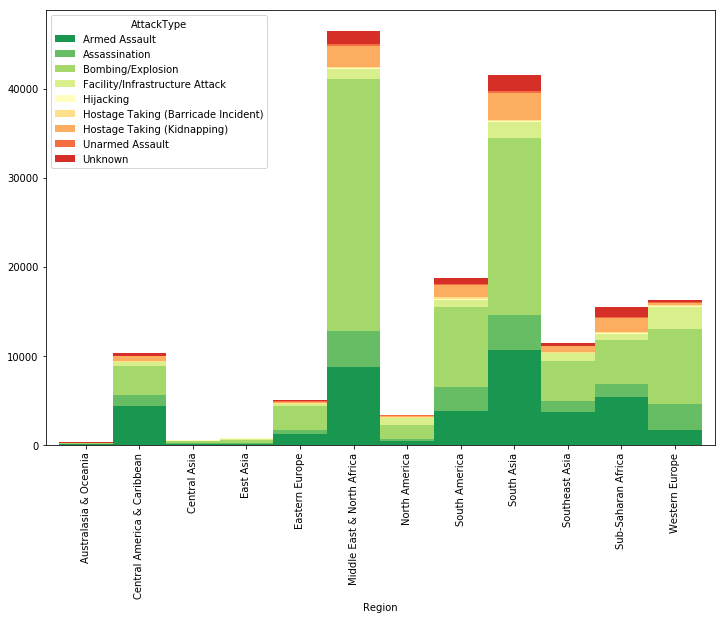

In [13]:
pd.crosstab(terrorism_dataset.Region,terrorism_dataset.AttackType).plot.bar(stacked=True,width=1,color=sns.color_palette('RdYlGn_r',9))
fig=plt.gcf()
fig.set_size_inches(12,8)

- In Middle East & North Africa , South Asia: Bombing/Explosion is the most common terrorist attack.
<br>
-  Followed by Assasination, Armed Assault, Hostage Taking.
<br>
- Australasia & Oceania, Central Asia, and East Asia Region are least prone to Terrorist Activities.

#### Attack Type Vs Countries

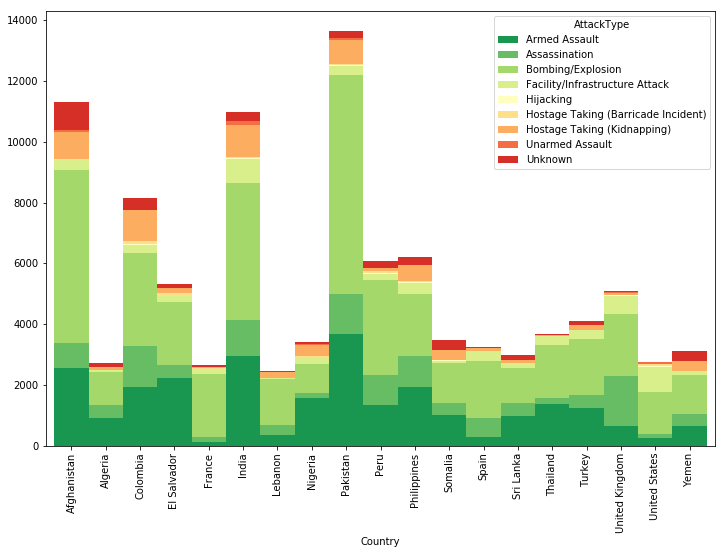

In [14]:
country_15=terrorism_dataset[terrorism_dataset['Country'].isin(terrorism_dataset['Country'].value_counts()[1:20].index)]
pd.crosstab(country_15.Country,country_15.AttackType).plot.bar(stacked=True,width=1,color=sns.color_palette('RdYlGn_r',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

- Bombing and Explosion is the common terrorist attack in all the countries

#### Terror Groups

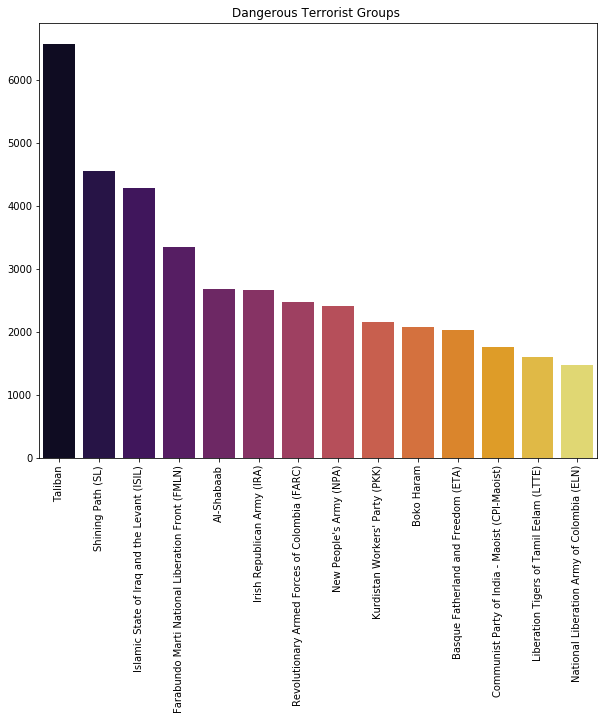

In [15]:
sns.barplot(terrorism_dataset['Group'].value_counts()[1:15].index,terrorism_dataset['Group'].value_counts()[1:15].values,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Dangerous Terrorist Groups ')
plt.show()

- The Terrorist group that has been involved in the most of the Terrorist Attacks is Taliban

#### Top 10 Terrorist Groups over the years

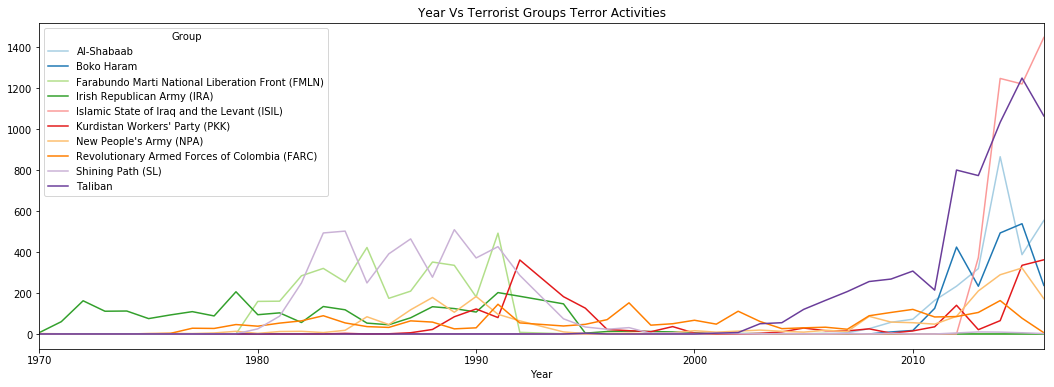

In [16]:
terror_group_10=terrorism_dataset[terrorism_dataset['Group'].isin(terrorism_dataset['Group'].value_counts()[1:11].index)]
pd.crosstab(terror_group_10.Year,terror_group_10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
plt.title('Year Vs Terrorist Groups Terror Activities')
fig.set_size_inches(18,6)
plt.show()

#### Global view of terrorist attacks by different groups

In [17]:
def group_point(group,color,label):
    lat_group=list(top_groups[top_groups['Group']==group].latitude)
    long_group=list(top_groups[top_groups['Group']==group].longitude)
    x_group,y_group=m4(long_group,lat_group)
    m4.plot(x_group,y_group,'go',markersize=3,color=j,label=i)

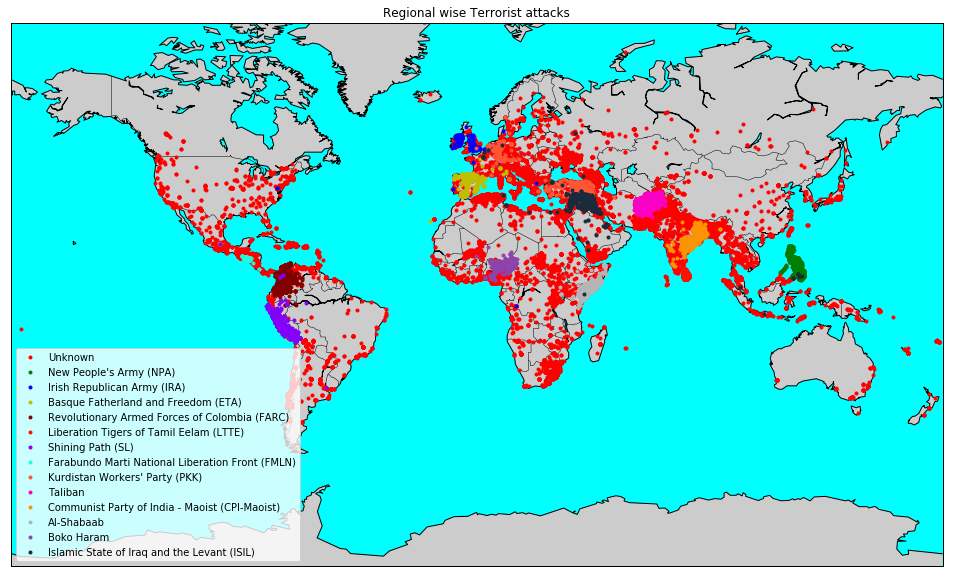

In [18]:
top_groups=terrorism_dataset[terrorism_dataset['Group'].isin(terrorism_dataset['Group'].value_counts()[:14].index)]
m4 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='aqua')
m4.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
group=list(top_groups['Group'].unique())
for i,j in zip(group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional wise Terrorist attacks')
plt.show()

World Map showing Different Terrorist Attack groups attacking in different region.

In [19]:
# Top 5 countries prone to Terrorist Attacks
terrorism_dataset['Country'].value_counts()[:5].index

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia'], dtype='object')

## Terrorism and Tourism

#### Terrorist attacks in Top 5 countries from 1970 to 2015

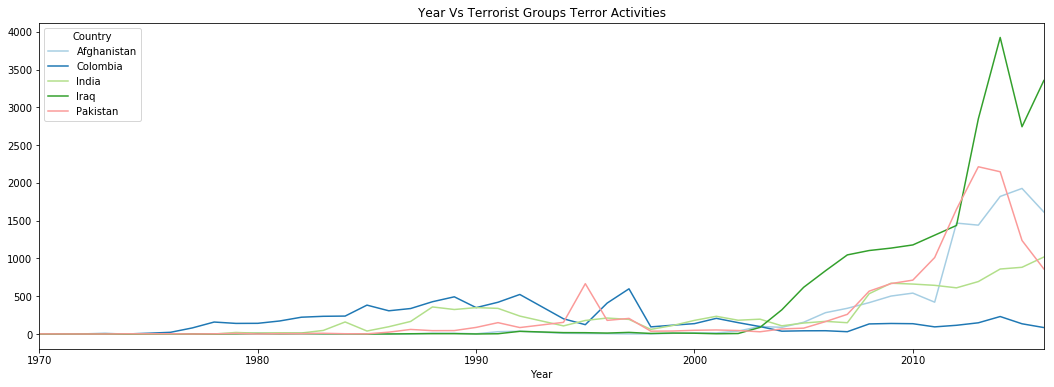

In [20]:
# Terrorist attacks in Top 5 countries from 1970 to 2015
country_5=terrorism_dataset[terrorism_dataset['Country'].isin(terrorism_dataset['Country'].value_counts()[:5].index)]
country_year = pd.crosstab(country_5.Year,country_5.Country).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
plt.title('Year Vs Terrorist Groups Terror Activities')
fig.set_size_inches(18,6)
plt.show()

- Terrorist attacks in Iraq have increased in recent years.

#### Year Vs Tourism

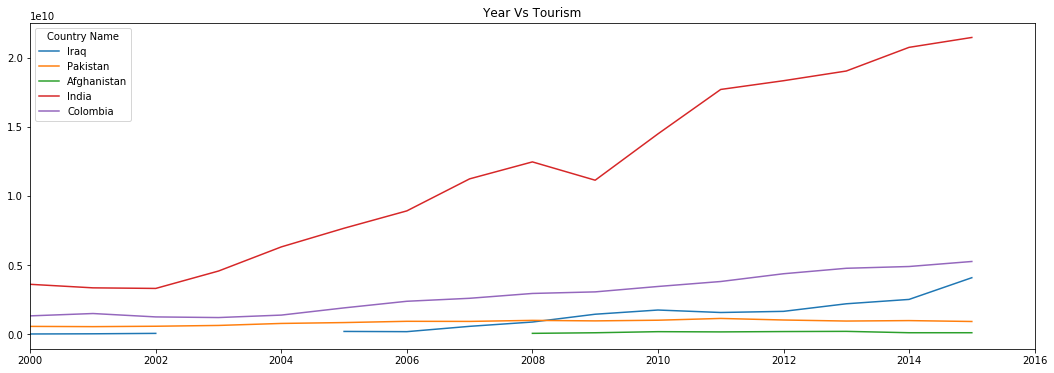

In [21]:
tourism_transpose_1 = tourism_transpose[['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia']]
years=[2000, 2001, 2002, 2003, 2004,  2005, 2006, 2007,2008, 2009, 2010,  2011, 2012, 2013, 2014, 2015,2016]
tourism_top_5 =tourism_transpose_1.loc[years]
tourism_top_5.plot()
fig=plt.gcf()
plt.title('Year Vs Tourism')
fig.set_size_inches(18,6)
plt.show()

- In the year 2008 in India, there were terrorist attacks in Mumbai, during that time tourism in that place has decreased.
- During 2014-2015 in Iraq, terrorist attacks have decreased and in that phase we can see there is rise in tourism. But we cannot conclude this is due to the decline in terrorist activities.

#### Year Vs GDP

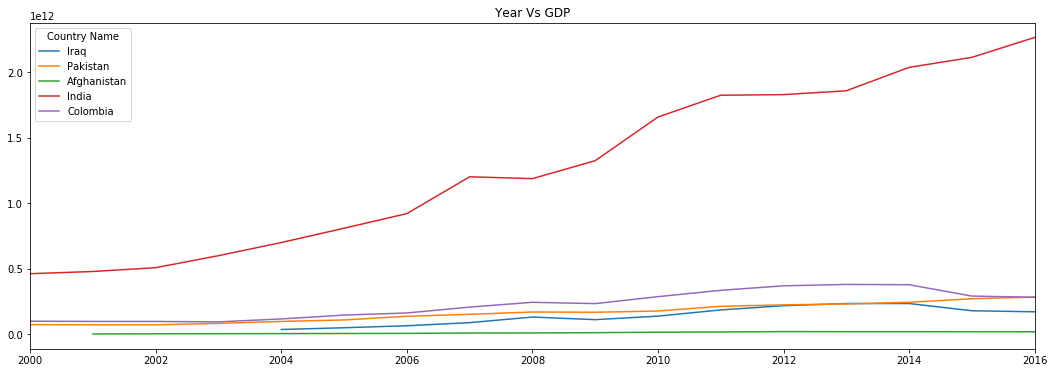

In [22]:
gdp_transpose_1 = gdp_transpose[['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia']]
years=[2000, 2001, 2002, 2003, 2004,  2005, 2006, 2007,2008, 2009, 2010,  2011, 2012, 2013, 2014, 2015,2016]
gdp_top_5 =gdp_transpose_1.loc[years]
gdp_top_5.plot()
fig=plt.gcf()
plt.title('Year Vs GDP')
fig.set_size_inches(18,6)
plt.show()

- India's GDP is continuously increasing from 2000 to 2016 in contrast to other top terrorist prone countries.

#### Terrorism and GDP

In [23]:
terrorism_1 = terrorism_dataset[['Year','Country','Target_type']]
terrorism_1 = terrorism_1[terrorism_1['Target_type']=='Business']
terrorism_1.groupby(["Year", "Country"]).count()
terrorism_iraq = terrorism_1[terrorism_1['Country']=='Iraq']
terrorism_iraq_year = terrorism_iraq.groupby('Year').count()
terrorism_iraq_year_sorted= terrorism_iraq_year.sort_values(by=['Country'])


#### Terrorism in Iraq from 2009 to 2016

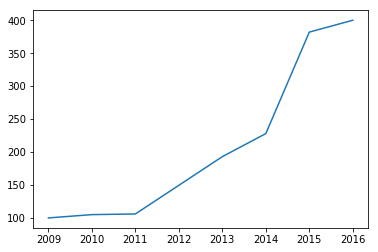

In [24]:
years=[2009,2010,2011,2013,2014,2015,2016]
y = terrorism_iraq_year_sorted.loc[years] 
plt.plot(years,y['Country'])

- There is a drastic increase in number of terrorist attacks from 2014 to 2015

#### GDP of Iraq from 2009 to 2016

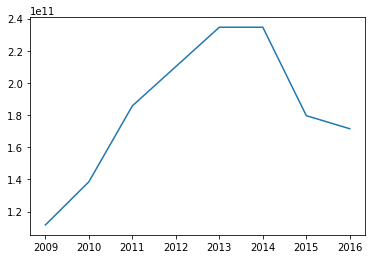

In [25]:
gdp_iraq =  gdp_dataset[gdp_dataset['Country Name'] == 'Iraq']
y = gdp_iraq[years].values[0]
plt.plot(years,y)

- There is a fall in GDP from 2014 onwards

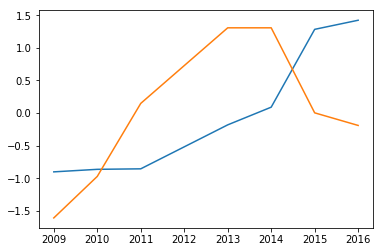

In [26]:
years=[2009,2010,2011,2013,2014,2015,2016]
y = terrorism_iraq_year_sorted.loc[years] 
df = y['Country']
normalized_df=(df-df.mean())/df.std()
type(normalized_df)
normalized_df.values
plt.plot(years,normalized_df.values)
gdp_iraq =  gdp_dataset[gdp_dataset['Country Name'] == 'Iraq']
y = gdp_iraq[years].values[0]
df =y;
normalized_df=(df-df.mean())/df.std()
plt.plot(years,normalized_df)

There is a drastic increase in number of terrorist attacks from 2014 to 2015. There is a fall in GDP from 2014 onwards

In [27]:
tourism_dataset.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.213400e+09,1.352000e+09,1.223000e+09,1.254000e+09,1.358000e+09,1.412000e+09,1.506000e+09,1.625000e+09,1.660000e+09,NaN
1,Afghanistan,AFG,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.700000e+07,9.000000e+07,1.690000e+08,1.520000e+08,1.770000e+08,1.910000e+08,9.200000e+07,9.200000e+07,NaN
2,Angola,AGO,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.360000e+08,2.930000e+08,5.540000e+08,7.260000e+08,6.530000e+08,7.110000e+08,1.241000e+09,1.597000e+09,1.171000e+09,NaN
3,Albania,ALB,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.479000e+09,1.848000e+09,2.014000e+09,1.780000e+09,1.833000e+09,1.623000e+09,1.670000e+09,1.849000e+09,1.614000e+09,NaN
4,Andorra,AND,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Tourism of Year 2014

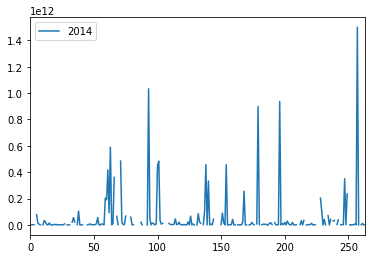

In [28]:
tourism_dataset1 = tourism_dataset
tourism_dataset1 = tourism_dataset1.drop('Indicator Name',1)
tourism_dataset1 = tourism_dataset1.drop('Indicator Code',1)
tourism_year_2014 = tourism_dataset1[['Country Name',2014]]
tourism_year_2014.plot()

- Line plot for the Number of Tourist in 2014

### Performing K means Clustering

#### Scatter plot for Terrorist Attack vs. GDP in year 2014

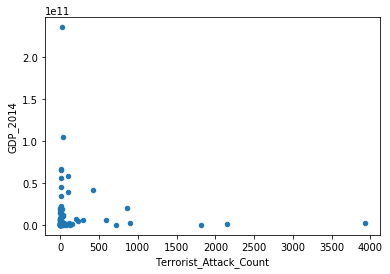

In [29]:
terrorism_dataset1 = terrorism_dataset
terrorism_dataset_year =  terrorism_dataset1.set_index(['Year'])
terrorism_dataset_year_2014 = pd.DataFrame(terrorism_dataset_year.loc[2014])
terrorism_2014_country = pd.DataFrame(terrorism_dataset_year_2014['Country'].value_counts())
terrorism_2014_country.reset_index(level=0, inplace=True)
terrorism_2014_country.rename(columns={'index': 'Country Name', 'Country': 'Terrorist_Attack_Count'}, inplace=True)
tourism_year_2014.rename(columns={2014: 'GDP_2014'}, inplace=True)
merged_dataset_1 = pd.merge(terrorism_2014_country, tourism_year_2014, on='Country Name')
merged_dataset_1.sort_values(by=['GDP_2014'], ascending=False)
merged_dataset_1.plot(kind='scatter', x= 'Terrorist_Attack_Count', y= 'GDP_2014')
#plt.show()

In [30]:
cluster_dataset = merged_dataset_1[['Terrorist_Attack_Count','GDP_2014']]
cluster_dataset = cluster_dataset[pd.notnull(cluster_dataset['GDP_2014'])]

### K Means Clustering in GDP and Terrorist Attack Dataset for year 2014

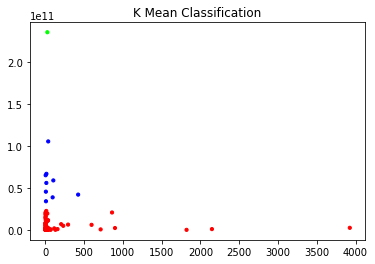

In [31]:
KM_model = KMeans(n_clusters=3)
KM_model.fit(cluster_dataset)
colormap = np.array(['blue','red', 'lime'])
plt.scatter(cluster_dataset.Terrorist_Attack_Count, cluster_dataset.GDP_2014, c=colormap[KM_model.labels_], s=10)
plt.title('K Mean Classification')
plt.show()

- Highest GDP United States, China, France, Spain, United Kingdom
- Highest attack count in 2014 Iraq,Pakistan, Afganistan, Ukrain,  Somalia
- The higher attack count is in country iraq and it has low gdp.

### Spectral Clustering in GDP and Terrorist Attack Dataset for year 2014

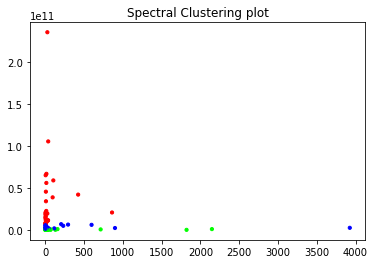

In [32]:
from sklearn.cluster import SpectralClustering
clust_s = SpectralClustering(n_clusters=3, eigen_solver='arpack', affinity="nearest_neighbors")
clust_s.fit(cluster_dataset)
plt.scatter(cluster_dataset.Terrorist_Attack_Count, cluster_dataset.GDP_2014, c=colormap[clust_s.labels_], s=10)
plt.title('Spectral Clustering plot')
plt.show()

### Linear Regression Analysis


- The Terrorism, Tourism and GDP data are transformed into a time series. 
- Further, linear regression was performed on the time series. 
- The count of terrorist activity, count of tourist arrivals and GDP for a range of years was used as the time series. 
- First, the data is modeled as a function of time. Secondly, a combination of all the dataset was used, for e.g. terrorist data was modeled as a function of GDP and Tourists count, and so on. 
- Some datasets had missing values. Both the cases where the missing values were removed and the missing values were replaced with the column mean were analysed. 
- The model was evaluated using $R^2$, p-value for the estimates. 

In [33]:
def Clean_tourism_dataset(tourism):
    
    tourism.drop(tourism.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                             31,32,33,34,35,36,37,38,60]], axis=1, inplace=True)
    return tourism

def Clean_terrorism_dataset(terrorism):
    return terrorism

def Clean_gdp_dataset(gdp):
    return gdp

def Plot_Performance(model_linear,dataset,x_axis,y_axis):
    model_linear_pred = model_linear.predict()
    plt.figure()
    dataset.plot(kind="line", x=x_axis, y=y_axis)
    plt.plot(dataset[x_axis],model_linear_pred, '-')
    plt.figure()
    model_linear.resid.plot(kind = "bar")
    
def Plot_Data(dataset):
    plt.figure()
    plt.plot(dataset)
    plt.figure()
    dataset.plot(kind = "hist", bins = 30)
    
def MAPE_and_Plots(dataset,x_axis,y_axis):
    plt.figure()
    dataset.plot(kind="line", y = [x_axis, y_axis])
    return np.mean(np.abs((dataset[x_axis] - dataset[y_axis]) / dataset[x_axis])) * 100
    return rmse

In [34]:
tourism = Clean_tourism_dataset(tourism_dataset)
terrorism = Clean_terrorism_dataset(terrorism_dataset)
gdp = Clean_gdp_dataset(gdp_dataset)

## Terrorism Dataset

In [35]:
target_country = 'United States'
temp_df = terrorism[terrorism['Country']== target_country]
terror_yearly_count = pd.DataFrame(temp_df['Year'].value_counts())
terror_yearly_count = terror_yearly_count.sort_index()
terror_1 = terror_yearly_count.copy()

#### Terrorist Attack vs. Year for United States

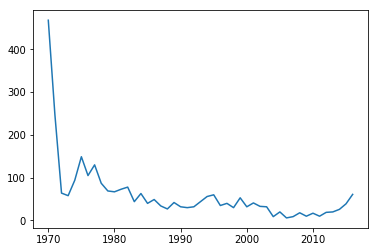

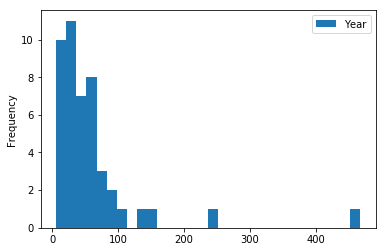

In [36]:
Plot_Data(terror_yearly_count)

- First Plot shows the Terrorist Attack in United States Yearly basis whereas second plot is the Histogram of the same.
- From above graphs we can infer that the terrorist attacks were high in early 1970 to 1980s. Later on it kept on decresing.

In [37]:
model_mean_pred =[]
model_mean_pred = terror_yearly_count.mean()
terror_yearly_count["TerrorMean"] = model_mean_pred['Year']

#### Mean Fit and Linear Regression of terrorism with time

129.38784796591435

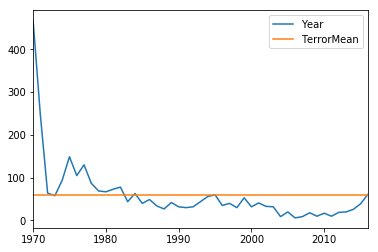

In [38]:
model_mean_MAPE = MAPE_and_Plots(terror_yearly_count,"Year","TerrorMean")
model_mean_MAPE

Performing Linear Regression where:
- Response Variable = 'Year' 
- Predictor Variable = 'Time'

In [39]:
terror_yearly_count['Time_Index'] = list(range(1 , len(terror_yearly_count)+1))
model_linear = smf.ols('Year ~ Time_Index', data = terror_yearly_count).fit()
print(model_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                   Year   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     23.00
Date:                Tue, 12 Dec 2017   Prob (F-statistic):           1.88e-05
Time:                        19:01:45   Log-Likelihood:                -253.60
No. Observations:                  46   AIC:                             511.2
Df Residuals:                      44   BIC:                             514.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    136.7246     18.384      7.437      0.0

#### Regression Plot & Error Plot - Terrorism with Time

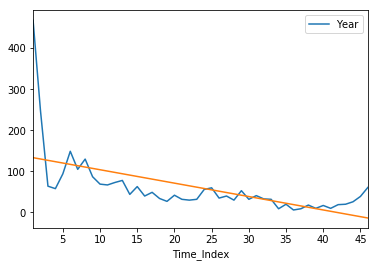

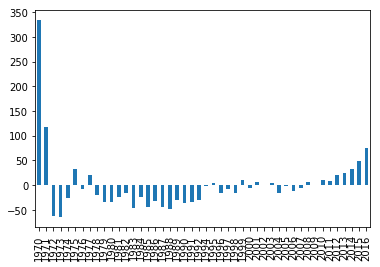

In [40]:
Plot_Performance(model_linear,terror_yearly_count,"Time_Index","Year")

## Tourism Dataset

#### Tourism vs. Year for United States

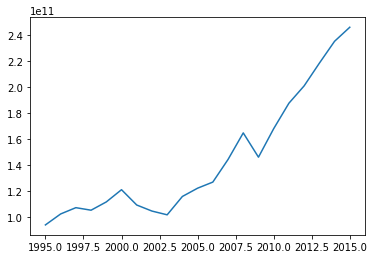

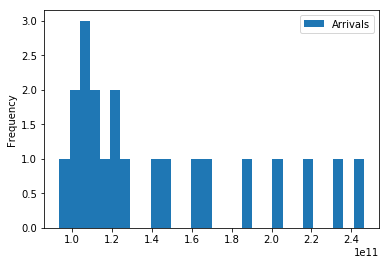

In [41]:
tour_df = tourism[tourism['Country Name']==target_country]
tour_df = tour_df.drop(["Country Name","Country Code"], axis = 1)
tour_df = tour_df.transpose()
col_name = list(tour_df.columns)
tour_df = tour_df.rename(columns={col_name[0]:'Arrivals'})
tour_df.head(5)
tour_1 = tour_df.copy()
Plot_Data(tour_df)

- First Plot shows the Tourism in United States Yearly basis whereas second plot is the Histogram of the same.
- From above graphs we can infer that the Tourism increased from early 2000s to 2016

#### Mean Fit and Linear Regression of tourism with time

27.568524609417466

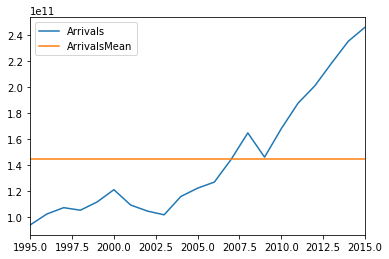

In [42]:
model_mean_pred =[]
model_mean_pred = tour_df.mean()
tour_df["ArrivalsMean"] = model_mean_pred['Arrivals']
model_mean_MAPE = MAPE_and_Plots(tour_df,"Arrivals","ArrivalsMean")
model_mean_MAPE

Performing Linear Regression where:
- Response Variable = 'Arrivals' 
- Predictor Variable = 'Time'

In [43]:
tour_df['Time_Index'] = list(range(1 , len(tour_df)+1))
model_linear = smf.ols('Arrivals ~ Time_Index', data = tour_df).fit()
print(model_linear.summary())


                            OLS Regression Results                            
Dep. Variable:               Arrivals   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     96.11
Date:                Tue, 12 Dec 2017   Prob (F-statistic):           7.24e-09
Time:                        19:01:52   Log-Likelihood:                -526.70
No. Observations:                  21   AIC:                             1057.
Df Residuals:                      19   BIC:                             1059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.717e+10   8.99e+09      7.473      0.0

#### Regression Plot & Error Plot - Tourism with Time

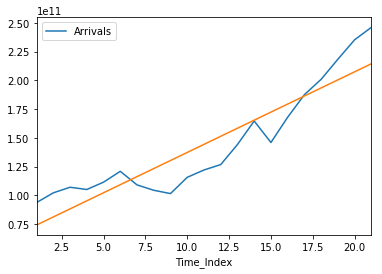

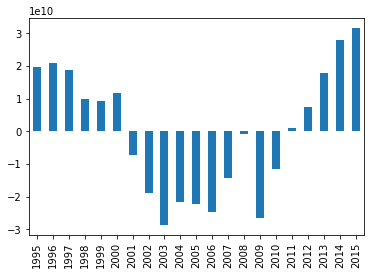

In [44]:
Plot_Performance(model_linear,tour_df,"Time_Index","Arrivals")

## GDP Dataset

#### GDP vs. Year for United States

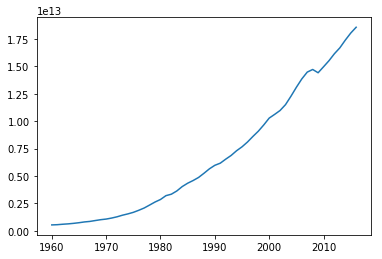

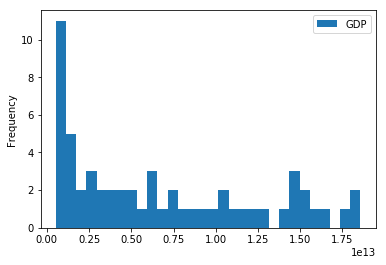

In [45]:
gdp_df = gdp[gdp['Country Name']==target_country]
gdp_df = gdp_df.drop(["Indicator Name","Indicator Code","Country Name","Country Code"], axis = 1)
gdp_df = gdp_df.transpose()
col_name = list(gdp_df.columns)
gdp_df = gdp_df.rename(columns={col_name[0]:'GDP'})
gdp_df.head(5)
gdp_1 = gdp_df.copy()
Plot_Data(gdp_df)

#### Mean Fit and Linear Regression of GDP with time

236.97915885068426

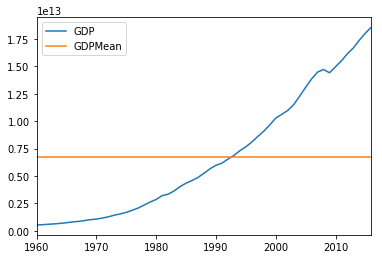

In [46]:
model_mean_pred =[]
model_mean_pred = gdp_df.mean()
gdp_df["GDPMean"] = model_mean_pred['GDP']
model_mean_MAPE = MAPE_and_Plots(gdp_df,"GDP","GDPMean")
model_mean_MAPE

Performing Linear Regression where:
- Response Variable = 'GDP' 
- Predictor Variable = 'Time'

In [47]:
gdp_df['Time_Index'] = list(range(1 , len(gdp_df)+1))
model_linear = smf.ols('GDP ~ Time_Index', data = gdp_df).fit()
print(model_linear.summary())


                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     835.4
Date:                Tue, 12 Dec 2017   Prob (F-statistic):           6.16e-35
Time:                        19:01:58   Log-Likelihood:                -1674.8
No. Observations:                  57   AIC:                             3354.
Df Residuals:                      55   BIC:                             3358.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.812e+12   3.81e+11     -7.377      0.0

#### Regression Plot & Error Plot - GDP with Time

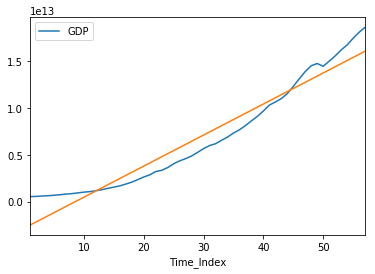

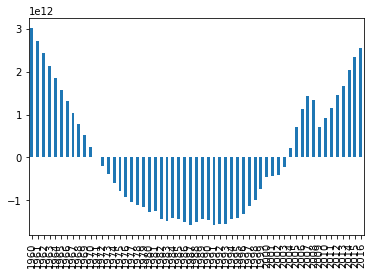

In [48]:
Plot_Performance(model_linear,gdp_df,"Time_Index","GDP")

## Combination of the datasets

In [49]:
combined_dataset = pd.concat([gdp_1, terror_1,tour_1], axis=1)
combined_dataset_1 = combined_dataset[np.isfinite(combined_dataset['Year'])]
combined_dataset_1 = combined_dataset_1[np.isfinite(combined_dataset_1['Arrivals'])]
combined_dataset_1['Time_Index'] = list(range(1 , len(combined_dataset_1)+1))
combined_dataset_1.head(5)

,GDP,Year,Arrivals,Time_Index
1995,7.664060e+12,60.0,9.374300e+10,1
1996,8.100201e+12,35.0,1.021960e+11,2
1997,8.608515e+12,40.0,1.070470e+11,3
1998,9.089168e+12,30.0,1.050950e+11,4
1999,9.660624e+12,53.0,1.114750e+11,5


### Ignored the rows with missing values

Performing Linear Regression where:
- Response Variable = 'GDP' 
- Predictor Variable = 'Year' and 'Arrivals'

In [50]:
model_linear = smf.ols('GDP ~  Time_Index + Year + Arrivals', data = combined_dataset_1).fit()
print(model_linear.summary())


                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     713.4
Date:                Tue, 12 Dec 2017   Prob (F-statistic):           4.52e-18
Time:                        19:02:03   Log-Likelihood:                -583.03
No. Observations:                  21   AIC:                             1174.
Df Residuals:                      17   BIC:                             1178.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.321e+12   2.97e+11     24.684      0.0

- Due to the large p-value, there is no association with the predictor(GDP) and the response variable (Arrivals) for a p-value cut-off of 0.5.

#### Regression Plot and Error Plot

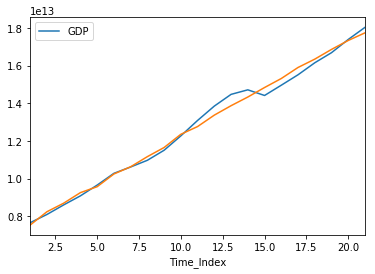

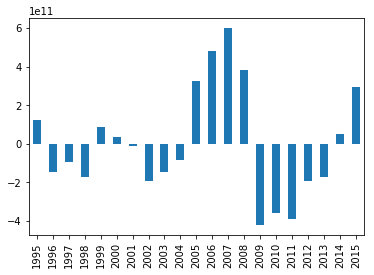

In [51]:
Plot_Performance(model_linear,combined_dataset_1,"Time_Index","GDP")

Performing Linear Regression where:
- Response Variable = 'Year' 
- Predictor Variable = 'GDP' and 'Arrivals'

In [52]:
model_linear = smf.ols('Year ~  Time_Index + GDP + Arrivals', data = combined_dataset_1).fit()
print(model_linear.summary())


                            OLS Regression Results                            
Dep. Variable:                   Year   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     10.35
Date:                Tue, 12 Dec 2017   Prob (F-statistic):           0.000415
Time:                        19:02:07   Log-Likelihood:                -75.109
No. Observations:                  21   AIC:                             158.2
Df Residuals:                      17   BIC:                             162.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.4101     53.670      1.331      0.2

- Due to the large p-value, there is no association with the predictor(Terrorist Activity) and the response variable (Time) for a p-value cut-off of 0.5.

#### Regression Plot and Error Plot

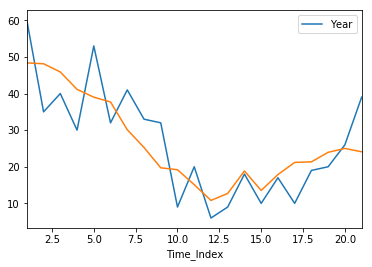

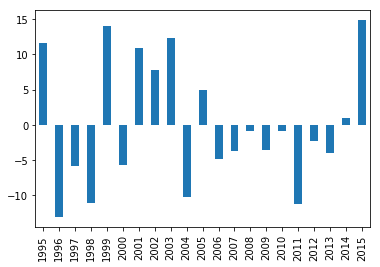

In [53]:
Plot_Performance(model_linear,combined_dataset_1,"Time_Index","Year")

Performing Linear Regression where:
- Response Variable = 'Arrivals' 
- Predictor Variable = 'Year' and 'GDP'

In [54]:
model_linear = smf.ols('Arrivals ~  Time_Index + Year + GDP', data = combined_dataset_1).fit()
print(model_linear.summary())


                            OLS Regression Results                            
Dep. Variable:               Arrivals   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     55.12
Date:                Tue, 12 Dec 2017   Prob (F-statistic):           5.72e-09
Time:                        19:02:12   Log-Likelihood:                -520.70
No. Observations:                  21   AIC:                             1049.
Df Residuals:                      17   BIC:                             1054.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.201e+10   9.24e+10     -0.238      0.8

- Due to the large p-value, there is no association with the predictor(Arrivals) and the response variable (GDP) for a p-value cut-off of 0.5.

#### Regression Plot and Error Plot

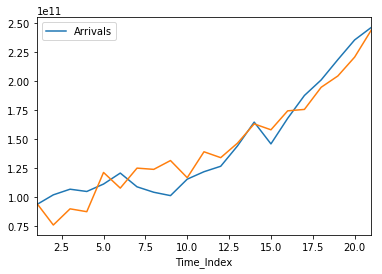

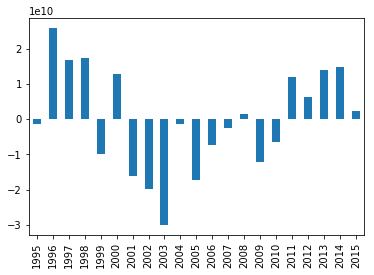

In [55]:
Plot_Performance(model_linear,combined_dataset_1,"Time_Index","Arrivals")

# Filled the missing values with the mean.

In [56]:
combined_dataset['Year'] = pd.DataFrame(combined_dataset['Year'].fillna(combined_dataset_1['Year'].mean()))
combined_dataset['Arrivals'] = pd.DataFrame(combined_dataset['Arrivals'].fillna(combined_dataset_1['Arrivals'].mean()))
combined_dataset['Time_Index'] = list(range(1 , len(combined_dataset)+1))

Performing Linear Regression where:
- Response Variable = 'GDP' 
- Predictor Variable = 'Year' and 'Arrivals'

In [57]:
model_linear = smf.ols('GDP ~  Time_Index + Year + Arrivals', data = combined_dataset).fit()
print(model_linear.summary())


                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     353.0
Date:                Tue, 12 Dec 2017   Prob (F-statistic):           5.40e-35
Time:                        19:02:17   Log-Likelihood:                -1667.4
No. Observations:                  57   AIC:                             3343.
Df Residuals:                      53   BIC:                             3351.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.484e+12   9.12e+11     -6.014      0.0

#### Regression Plot and Error Plot

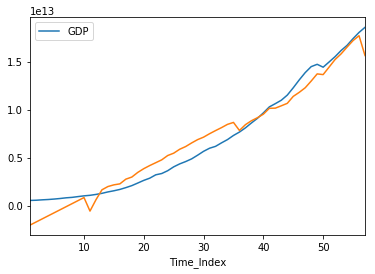

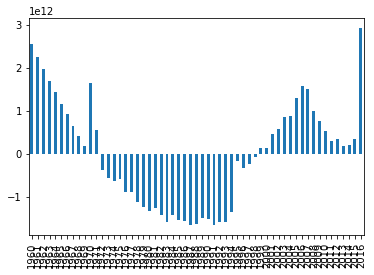

In [58]:
Plot_Performance(model_linear,combined_dataset,"Time_Index","GDP")

Performing Linear Regression where:
- Response Variable = 'Year' 
- Predictor Variable = 'GDP' and 'Arrivals'

In [59]:
model_linear = smf.ols('Year ~  Time_Index + GDP + Arrivals', data = combined_dataset).fit()
print(model_linear.summary())


                            OLS Regression Results                            
Dep. Variable:                   Year   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     2.676
Date:                Tue, 12 Dec 2017   Prob (F-statistic):             0.0564
Time:                        19:02:57   Log-Likelihood:                -317.19
No. Observations:                  57   AIC:                             642.4
Df Residuals:                      53   BIC:                             650.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6871     60.890      0.373      0.7

#### Regression Plot and Error Plot

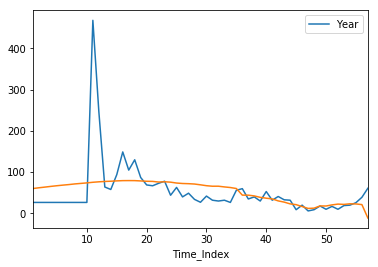

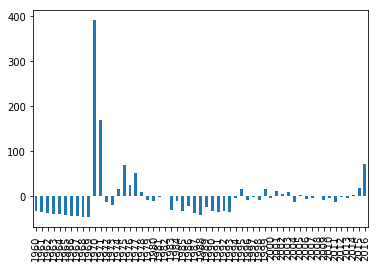

In [60]:
Plot_Performance(model_linear,combined_dataset,"Time_Index","Year")

Performing Linear Regression where:
- Response Variable = 'Arrivals' 
- Predictor Variable = 'Year' and 'GDP'

In [61]:
model_linear = smf.ols('Arrivals ~  Time_Index + Year + GDP', data = combined_dataset).fit()
print(model_linear.summary())


                            OLS Regression Results                            
Dep. Variable:               Arrivals   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     5.540
Date:                Tue, 12 Dec 2017   Prob (F-statistic):            0.00220
Time:                        19:03:00   Log-Likelihood:                -1444.7
No. Observations:                  57   AIC:                             2897.
Df Residuals:                      53   BIC:                             2906.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.559e+11   1.03e+10     15.098      0.0

#### Regression Plot and Error Plot

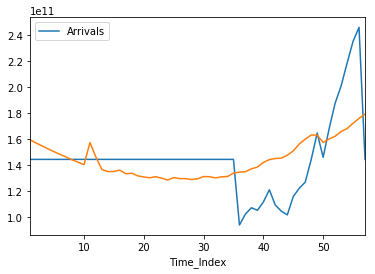

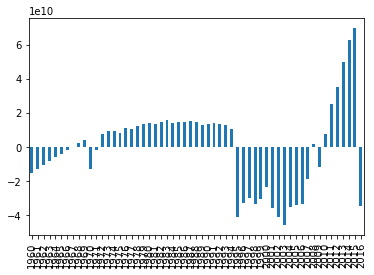

In [62]:
Plot_Performance(model_linear,combined_dataset,"Time_Index","Arrivals")

# Conclusions

- There are instances where GDP of a country gets affected due to terrorism activity

- There are instances where Tourism of a country gets affected due to terrorism activity
    
- Clustered the countries based on various aspects such as Safety, Economic Growth,  etc.

# Thank You